### Проект по общему анализу сервиса аренды самокатов GoFast
<div class="alert alert-block alert-info">

    
в данном проекте будут выполнены следующие задачи:
* Общие распределения пользователей по возрасту, городу, статусу подписки, времени и расстояния затраченого на поездки
* Вычисление выручки от каждого пользователя помесячно
* Проверена гипотеза о том, что пользователи с подпиской таратят больше времени на поездки 
* Проверена гипотеза о том, что пользователи с подпиской в среднем проезжают расстояние не превышающее оптимальное для самоката (3130м)  
* Проверена гипотеза о том, что пользователи с подпиской выгоднее с точки зрения получения ежемесячной прибыли
</div>

<div class="alert alert-block alert-info">
все выводы будут сделаны на основании имеющейся информации:
    
  
<b>Пользователи — users_go.csv</b>

user_id - уникальный идентификатор пользователя
    
name - имя пользователя
    
age - возраст
    
city - город
    
subscription_type - тип подписки (free, ultra)
    
    
<b>Поездки — rides_go.csv</b>
    
user_id - уникальный идентификатор пользователя
    
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    
data - дата совершения поездки
    
    
<b>Подписки — subscriptions_go.csv</b> 
    
subscription_type - тип подписки
    
minute_price - стоимость одной минуты поездки по данной подписке
    
start_ride_price - стоимость начала поездки
    
subscription_fee - стоимость ежемесячного платежа

</div>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [59]:
users_data=pd.read_csv('/datasets/users_go.csv')
rides_data=pd.read_csv('/datasets/rides_go.csv')
subscription_data=pd.read_csv('/datasets/subscriptions_go.csv')

In [60]:
users_data.info()
users_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [61]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

<div class="alert alert-block alert-info">
в таблице сдержится общая информация о каждом пользователе
    
пропусков в данных нет
</div>

In [62]:
rides_data.info()
rides_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [63]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

<div class="alert alert-block alert-info">
в таблице сдержится информация о всех поездках по каждому пользователю
    
пропусков в данных нет
</div>

In [64]:
subscription_data.info()
subscription_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [65]:
subscription_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

<div class="alert alert-block alert-info">
таблице сдержится информация о тарифах представленных в приложении
    
пропусков в данных нет
</div>

 <div class="alert alert-block alert-info">
все наборы данных прочитаны, пропусков не имеют, названия столбцов соответсвуют данным
</div>

#### Шаг 2. Предобработка данных

In [66]:
rides_data['date']=pd.to_datetime(rides_data['date'])
rides_data['month']=pd.DatetimeIndex(rides_data['date']).month

<div class="alert alert-block alert-info">
привожу столбец к формату Datetime    
</div>

In [67]:
users_data.duplicated().sum()

31

In [68]:
rides_data.duplicated().sum()

0

In [69]:
subscription_data.duplicated().sum()

0

In [70]:
users_data=users_data.drop_duplicates()
users_data.duplicated().sum()

0

<div class="alert alert-block alert-info">
дубликаты  были обнаружены только в одной таблице и устранены    
</div>

#### Шаг 3. Исследовательский анализ данных

Text(0.5, 1.0, 'Распределение данных по городам')

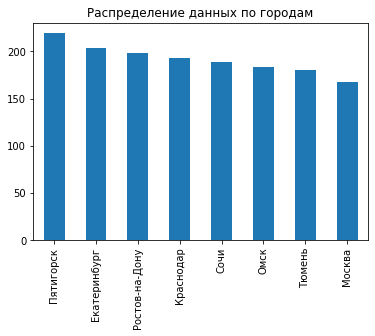

In [71]:
users_data['city'].value_counts().plot(kind='bar')
plt.title('Распределение данных по городам')

<div class="alert alert-block alert-info">
выборка примерно равно распределена по городам, значит данные не будут сильно зависить от этого параметра    
</div>

Text(0.5, 1.0, 'Распределение пользователей по типу подписки')

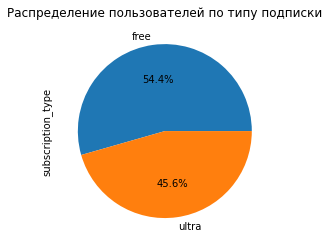

In [72]:
users_data['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Распределение пользователей по типу подписки')

<div class="alert alert-block alert-info">
соотношение пользователей близко к 50%,следовательно данных достаточно для корректного сравнения двух выборок     
</div>

Text(0, 0.5, 'Кол-во пользователей')

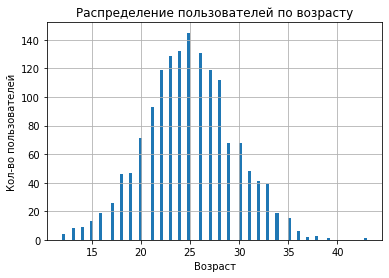

In [73]:
users_data['age'].hist(bins=100)
plt.title('Распределение пользователей по возрасту')
plt.xlabel("Возраст")
plt.ylabel("Кол-во пользователей")

In [74]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<div class="alert alert-block alert-info">
возраст пользователей распределен нормально, выбросов нет 
    
средний возраст пользователя составляет ~25лет
    
минимальное значание - 12 лет
    
максимальное значение - 43 года
    
основной объем данных распределен на промежутке от 22 до 28 лет
</div>

Text(0, 0.5, 'Кол-во пользователей')

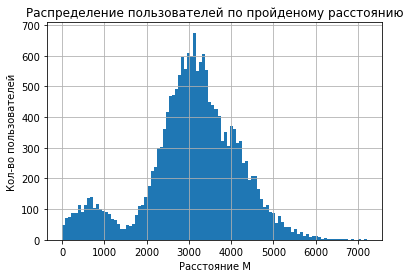

In [75]:
rides_data['distance'].hist(bins=100)
plt.title('Распределение пользователей по пройденому расстоянию')
plt.xlabel("Расстояние М")
plt.ylabel("Кол-во пользователей")

In [76]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<div class="alert alert-block alert-info">
Среднее расстояние поездки составляет 3070 метров, основной набор данных соответствует расстоянию 2500-3800м
    
Предположу что первый пик 0-1200м связан с тем, что у самоката была разряжена батарея и он смог проехать только такое расстояние на оставшемся заряде, либо проводилась акция на поездки именно на это расстояние
    
Подтвердить или опровергнуть это можно только имея данные по степени зарядки на момент взятия самоката или проведенных акциях. По имеющимся у нас данным этот пик нельзя с точностью объяснитью    
</div>

Text(0, 0.5, 'Кол-во пользователей')

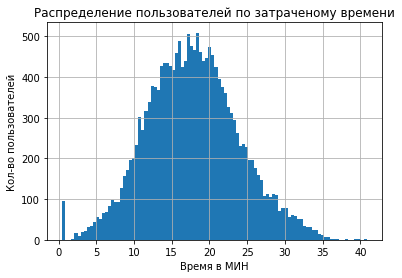

In [77]:
rides_data['duration'].hist(bins=100)
plt.title('Распределение пользователей по затраченому времени')
plt.xlabel("Время в МИН")
plt.ylabel("Кол-во пользователей")

In [78]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<div class="alert alert-block alert-info">
среднее время поездки составляет 18 минут, основной набор данных соответсвует времени 13-21 минута
    
график распределен нормально
    
пик у 0 появляется из за по ошибке взятых самокатов или малого количества зарядки на нем, на мой взгляд его не следует убирать, так как даже взятие самоката на 1 минуту у человека без подписки, тоже принесет прибыль и отразиться в конечных расчетах
</div>

#### Шаг 4. Объединение данных

In [79]:
data = users_data.merge(rides_data,on='user_id',how='right')
data = data.merge(subscription_data,on='subscription_type',how='left')
data.head(3)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


<div class="alert alert-block alert-info">
объединяю данные таблиц     
</div>

In [81]:
data_sub=data[data['subscription_type']=='ultra']
data_no_sub=data[data['subscription_type']=='free']

Text(0, 0.5, 'Кол-во пользователей')

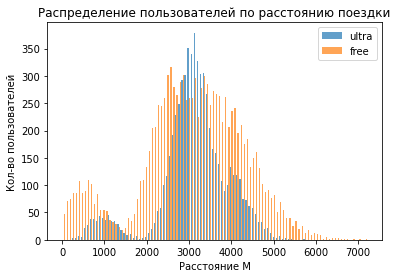

In [82]:
subdist=data_sub['distance']
nosubdist=data_no_sub['distance']
plt.hist([subdist,nosubdist], bins=100,alpha=0.7)
plt.legend(['ultra','free'])
plt.title('Распределение пользователей по расстоянию поездки')
plt.xlabel("Расстояние М")
plt.ylabel("Кол-во пользователей")

In [83]:
data_sub['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [84]:
data_no_sub['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

<div class="alert alert-block alert-info">
среднее расстояние поездки больше у пользователей с подпиской (3115м против 3045м)

у пользователей без подписки основная часть данных распределена на большем промежутке и имеет больший максимум

так же пользователи с подпиской не совершают ошибочные взятия самоката с длинной поездки близкой к 0
</div>

Text(0, 0.5, 'Кол-во пользователей')

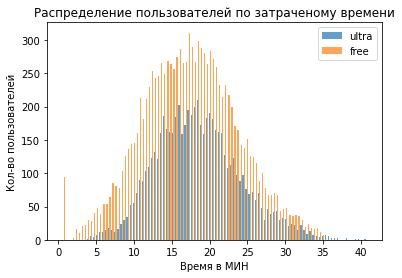

In [85]:
subdur=data_sub['duration']
nosubdur=data_no_sub['duration']
plt.hist([subdur,nosubdur], bins=100,alpha=0.7)
plt.legend(['ultra','free'])
plt.title('Распределение пользователей по затраченому времени')
plt.xlabel("Время в МИН")
plt.ylabel("Кол-во пользователей")

In [86]:
data_sub['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [87]:
data_no_sub['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

<div class="alert alert-block alert-info">
среднее время поездки больше у пользователей с подпиской (18,5 мин против 17,3 мин)

данные по времени поездки распределены примерно одинаково вне зависимости от наличия подписки

так же пользователи с подпиской не совершают ошибочные взятия самоката с временем поездки близким к 0
</div>

#### Шаг 5. Подсчёт выручки

In [88]:
data['duration']=np.ceil(data['duration'])
agg_data = data.pivot_table(index=['user_id', 'month'], 
                              values = ['distance', 'duration', 'name', 'subscription_type'],
                              aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
agg_data.columns = ['distance_sum', 'duration_sum', 'rides_count', 'subscription_type']
 

agg_data = agg_data.reset_index()

def income_func (row):
    if row['user_id'] in data_sub['user_id'].values:
        return 6*row['duration_sum']+199
    if row['user_id'] in data_no_sub['user_id'].values:
        return 8*row['duration_sum']+ 50*row['rides_count']

agg_data['income'] = agg_data.apply(income_func, axis=1) 

ultra = agg_data.query('subscription_type == "ultra"')
free = agg_data.query('subscription_type == "free"')
display(agg_data.head(5))
display(agg_data.tail(5))

,user_id,month,distance_sum,duration_sum,rides_count,subscription_type,income
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0


,user_id,month,distance_sum,duration_sum,rides_count,subscription_type,income
11326,1534,6,3409.468534,26.0,2,free,308.0
11327,1534,8,7622.453034,48.0,2,free,484.0
11328,1534,9,4928.173852,23.0,1,free,234.0
11329,1534,11,13350.015305,78.0,4,free,824.0
11330,1534,12,2371.711192,16.0,1,free,178.0


<div class="alert alert-block alert-info">
создаю датафрейм с агрегированными данными agg_data и с помощью функции вычисляю помесячную прибыль от каждого пользователя income
    
так же создаю две новых таблицы по каждому типу подписки отдельно, для удобства дальнейшего сравнения
</div>

#### Шаг 6. Проверка гипотез

In [89]:
alpha = .05
 
results = st.ttest_ind(data_sub['duration'], data_no_sub['duration'], alternative='greater')
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
нулевая гипотеза - время поездки у пользвателей с подпиской и без равны
    
альтернативная гипотеза - время поездки у пользователей с подпиской больше
    
т.к нулевая гипотеза отвергнута то можно сказать, что владельцы подписки тратят больше времени на поездки     
</div>

In [90]:
alpha = .05
optimal= 3130
results = st.ttest_1samp(data_sub['distance'], optimal, alternative='less')
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
нулевая гипотеза - расстояние поездки у пользвателей с подпиской соответсвует оптимальному значнию 3130м
    
альтернативная гипотеза - расстояние поездки у пользователей с подпиской меньше оптимального
    
нулевая гипотеза не отвергнута, но это могло быть случайностью т.к. разница близка и лучше провести эксперимент на больший срок с большим количеством измерений    
</div>

In [91]:
ultra = agg_data.query('subscription_type == "ultra"')
free = agg_data.query('subscription_type == "free"')
alpha = 0.05
 
results = st.ttest_ind(ultra['income'],free['income'],equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.774828178795375e-39
Отвергаем нулевую гипотезу


In [92]:
ultra['income'].mean()

362.7921906022502

In [93]:
free['income'].mean()

328.6413651073845

<div class="alert alert-block alert-info">
нулевая гипотеза - ежемесячная прибыль от владельцев подписки равна прибыли от пользоваетелй без подписки
    
альтернативная гипотеза - ежемесячная прибыль от владельцев подписки больше
    
В резульате теста видно, что нулевая гипотеза отвергнута, следовательно средняя выручка за месяц больше от владельцев подписки     
</div>

<div class="alert alert-block alert-info">
<b>Выыод</b>  

По имеющимся данным можно сказать, что:
    
* Пользователи с подпиской приносят больше выручки, чем без
    
* По имеющемуся объему данных нельзя с уверенностью сказать, что пользователи с подпиской способствуют меньшему износу самоката из за поездок длинной до 3130м 
</div>